#  <center> FLIGHT PRICE PREDICTION 

#### Everyone before travelling likes to know the cheapest way to complete the journey as comfortably as possible. This project aims to predict the flight price of 6 different airlines over 6 different places with respect to diffrent factors. In this project we are also going to build and train models based on the operating hours. A thororugh study of such a data is very helpful to analyse and deduce valuable insights which can be of enormous help to both the passengers and airlines. 

## DATASET: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

#### The dataset contains 300153 instances and 11 columns of which 10 are features and 1 is the target variable.

#### The various features of the dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

#### Target variable:
1) Price: Target variable stores information of the ticket price.

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from sklearn.metrics import mean_absolute_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adagrad
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading the dataset

In [2]:
df1 = pd.read_csv("Clean_Dataset.csv");df1

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Checking data type of every column


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
df1.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# DATA PREPROCESSING

## Renaming 'class' as 'CLASS'

In [5]:
df1.rename(columns = {'class':'CLASS'}, inplace = True)

## Checking number of unique values for every column

In [6]:
df1.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
CLASS                    2
duration               476
days_left               49
price                12157
dtype: int64

## Clubing arrival and departure time into operating hours 


In [7]:
df1.departure_time.unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [8]:
df1.arrival_time.unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [9]:
operating_time = []
for i in range(300153):
    if(df1.departure_time[i] == 'Early_Morning' and df1.arrival_time[i] == 'Early_Morning'):
        operating_time.append('Peak_hours')
    elif(df1.departure_time[i] == 'Early_Morning' and df1.arrival_time[i] == 'Morning'):
        operating_time.append('Peak_hours')    
    elif(df1.departure_time[i] == 'Early_Morning' and df1.arrival_time[i] == 'Afternoon'):
        operating_time.append('Peak_hours')
    elif(df1.departure_time[i] == 'Early_Morning' and df1.arrival_time[i] == 'Evening'):
        operating_time.append('Peak_hours')
    elif(df1.departure_time[i] == 'Early_Morning' and df1.arrival_time[i] == 'Night'):
        operating_time.append('Peak_hours')
    elif(df1.departure_time[i] == 'Early_Morning' and df1.arrival_time[i] == 'Late_Night'):
        operating_time.append('Non-Peak_hours')
   
        
    elif(df1.departure_time[i] == 'Morning' and df1.arrival_time[i] == 'Early_Morning'):
        operating_time.append('Non-Peak_hours')
    elif(df1.departure_time[i] == 'Morning' and df1.arrival_time[i] == 'Morning'):
        operating_time.append('Peak_hours')    
    elif(df1.departure_time[i] == 'Morning' and df1.arrival_time[i] == 'Afternoon'):
        operating_time.append('Peak_hours')
    elif(df1.departure_time[i] == 'Morning' and df1.arrival_time[i] == 'Evening'):
        operating_time.append('Peak_hours')
    elif(df1.departure_time[i] == 'Morning' and df1.arrival_time[i] == 'Night'):
        operating_time.append('Peak_hours')
    elif(df1.departure_time[i] == 'Morning' and df1.arrival_time[i] == 'Late_Night'):
        operating_time.append('Non-Peak_hours')
        
        
    elif(df1.departure_time[i] == 'Afternoon' and df1.arrival_time[i] == 'Early_Morning'):
        operating_time.append('Non-Peak_hours')
    elif(df1.departure_time[i] == 'Afternoon' and df1.arrival_time[i] == 'Morning'):
        operating_time.append('Non-Peak_hours')    
    elif(df1.departure_time[i] == 'Afternoon' and df1.arrival_time[i] == 'Afternoon'):
        operating_time.append('Peak_hours')
    elif(df1.departure_time[i] == 'Afternoon' and df1.arrival_time[i] == 'Evening'):
        operating_time.append('Peak_hours')
    elif(df1.departure_time[i] == 'Afternoon' and df1.arrival_time[i] == 'Night'):
        operating_time.append('Peak_hours')
    elif(df1.departure_time[i] == 'Afternoon' and df1.arrival_time[i] == 'Late_Night'):
        operating_time.append('Non-Peak_hours')
        
        
    elif(df1.departure_time[i] == 'Evening' and df1.arrival_time[i] == 'Early_Morning'):
        operating_time.append('Non-Peak_hours')
    elif(df1.departure_time[i] == 'Evening' and df1.arrival_time[i] == 'Morning'):
        operating_time.append('Peak_hours')    
    elif(df1.departure_time[i] == 'Evening' and df1.arrival_time[i] == 'Afternoon'):
        operating_time.append('Peak_hours')
    elif(df1.departure_time[i] == 'Evening' and df1.arrival_time[i] == 'Evening'):
        operating_time.append('Peak_hours')
    elif(df1.departure_time[i] == 'Evening' and df1.arrival_time[i] == 'Night'):
        operating_time.append('Peak_hours')
    elif(df1.departure_time[i] == 'Evening' and df1.arrival_time[i] == 'Late_Night'):
        operating_time.append('Non-Peak_hours')
        
        
    elif(df1.departure_time[i] == 'Night' and df1.arrival_time[i] == 'Early_Morning'):
        operating_time.append('Non-Peak_hours')
    elif(df1.departure_time[i] == 'Night' and df1.arrival_time[i] == 'Morning'):
        operating_time.append('Peak_hours')    
    elif(df1.departure_time[i] == 'Night' and df1.arrival_time[i] == 'Afternoon'):
        operating_time.append('Peak_hours')
    elif(df1.departure_time[i] == 'Night' and df1.arrival_time[i] == 'Evening'):
        operating_time.append('Peak_hours')
    elif(df1.departure_time[i] == 'Night' and df1.arrival_time[i] == 'Night'):
        operating_time.append('Non-Peak_hours')
    elif(df1.departure_time[i] == 'Night' and df1.arrival_time[i] == 'Late_Night'):
        operating_time.append('Non-Peak_hours')
        
        
    elif(df1.departure_time[i] == 'Late_Night' and df1.arrival_time[i] == 'Early_Morning'):
        operating_time.append('Non-Peak_hours')
    elif(df1.departure_time[i] == 'Late_Night' and df1.arrival_time[i] == 'Morning'):
        operating_time.append('Non-Peak_hours')    
    elif(df1.departure_time[i] == 'Late_Night' and df1.arrival_time[i] == 'Afternoon'):
        operating_time.append('Non-Peak_hours')
    elif(df1.departure_time[i] == 'Late_Night' and df1.arrival_time[i] == 'Evening'):
        operating_time.append('Non-Peak_hours')
    elif(df1.departure_time[i] == 'Late_Night' and df1.arrival_time[i] == 'Night'):
        operating_time.append('Non-Peak_hours')
    elif(df1.departure_time[i] == 'Late_Night' and df1.arrival_time[i] == 'Late_Night'):
        operating_time.append('Non-Peak_hours') 

In [10]:
df1['operating_time'] = operating_time

In [11]:
df1

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,CLASS,duration,days_left,price,operating_time
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Peak_hours
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Peak_hours
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Peak_hours
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Peak_hours
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Peak_hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Peak_hours
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Peak_hours
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Peak_hours
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Peak_hours


## Removing unnecessary columns

In [12]:
df1.drop(df1.columns[[0, 2, 4, 6]], axis = 1, inplace = True); df1

,airline,source_city,stops,destination_city,CLASS,duration,days_left,price,operating_time
0,SpiceJet,Delhi,zero,Mumbai,Economy,2.17,1,5953,Peak_hours
1,SpiceJet,Delhi,zero,Mumbai,Economy,2.33,1,5953,Peak_hours
2,AirAsia,Delhi,zero,Mumbai,Economy,2.17,1,5956,Peak_hours
3,Vistara,Delhi,zero,Mumbai,Economy,2.25,1,5955,Peak_hours
4,Vistara,Delhi,zero,Mumbai,Economy,2.33,1,5955,Peak_hours
...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,one,Hyderabad,Business,10.08,49,69265,Peak_hours
300149,Vistara,Chennai,one,Hyderabad,Business,10.42,49,77105,Peak_hours
300150,Vistara,Chennai,one,Hyderabad,Business,13.83,49,79099,Peak_hours
300151,Vistara,Chennai,one,Hyderabad,Business,10.00,49,81585,Peak_hours


## EDA(Exploratory Data Analysis)

## Distribution of passengers for each airline

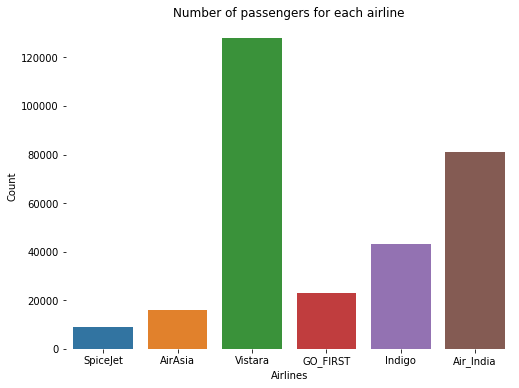

In [13]:
fig=plt.figure(figsize=(8,6))
plt.title('Number of passengers for each airline')
sns.countplot(x = "airline",data = df1)
plt.ylabel('Count')
plt.xlabel('Airlines')
sns.despine(bottom = True, left = True)

### From the above graph we can clearly see that the demand of Vistara flights is much higher compared to other airlines. It is followed by Air India which is followed by Indigo.

## Sales distribution for each airline

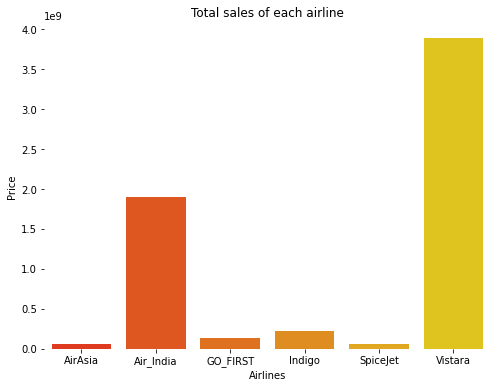

In [14]:
fig=plt.figure(figsize=(8,6))
plt.title('Total sales of each airline')
sns.barplot(y ='price', x='airline', data = df1.groupby('airline').sum()['price'].reset_index(),palette='autumn')
plt.ylabel('Price')
plt.xlabel('Airlines')
sns.despine(bottom = True, left = True)


### The above graph is conclusive of the fact that Vistara airlines has maximum sales followed by Air India.

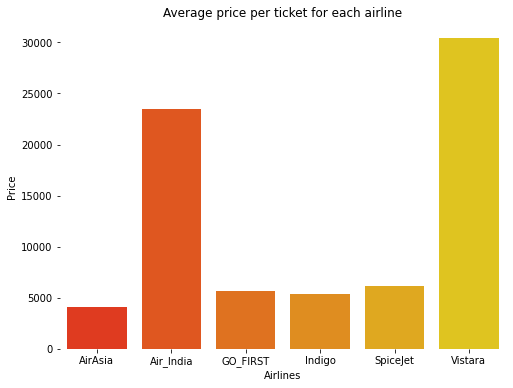

In [15]:
fig=plt.figure(figsize=(8,6))
plt.title('Average price per ticket for each airline')
sns.barplot(y ='price', x='airline', data = df1.groupby('airline').mean()['price'].reset_index(),palette='autumn')
plt.ylabel('Price')
plt.xlabel('Airlines')
sns.despine(bottom = True, left = True)


###  From the above graph we can see that the average price of ticket for Vistara is highest again followed by Air India. 

### From the above graphs we can conclude that though Vistara and Air India are the 2 costliest airlines still they enjoy maximum sales of tickets. 

## Sales during opertaing hours

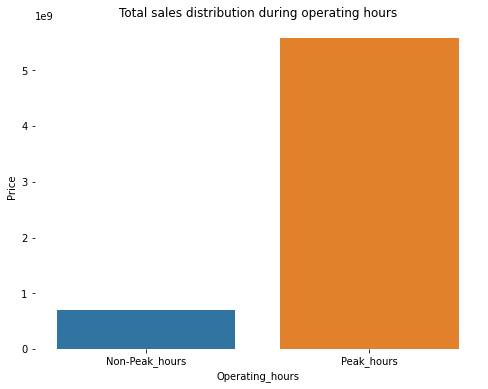

In [16]:
fig=plt.figure(figsize=(8,6))
plt.title('Total sales distribution during operating hours')
sns.barplot(y ='price', x='operating_time', data = df1.groupby('operating_time').sum()['price'].reset_index())
plt.ylabel('Price')
plt.xlabel('Operating_hours')
sns.despine(bottom = True, left = True)

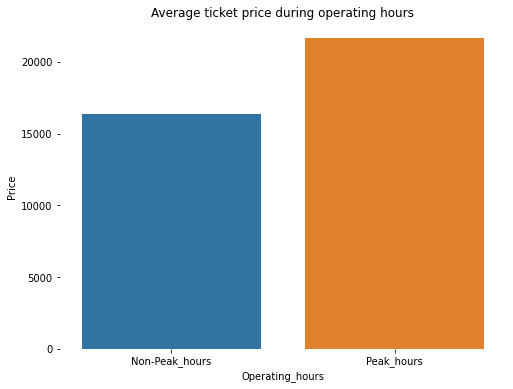

In [17]:
fig=plt.figure(figsize=(8,6))
plt.title('Average ticket price during operating hours')
sns.barplot(y ='price', x='operating_time', data = df1.groupby('operating_time').mean()['price'].reset_index())
plt.ylabel('Price')
plt.xlabel('Operating_hours')
sns.despine(bottom = True, left = True)

### The above graphs tells us that the average ticket price during peak hours is around 22000 while during non-peak hours it drops down to 17000.

## Distribution of sales with respect to stops

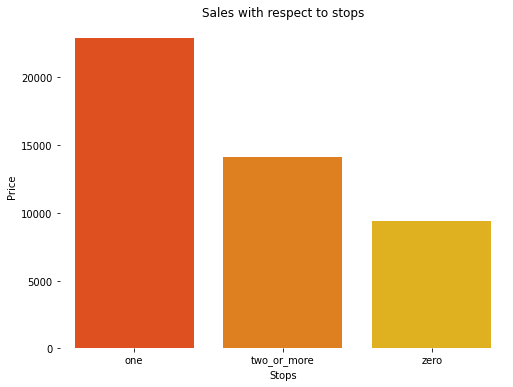

In [18]:
fig=plt.figure(figsize=(8,6))
plt.title('Sales with respect to stops')
sns.barplot(y ='price', x='stops', data = df1.groupby('stops').mean()['price'].reset_index(),palette='autumn')
plt.ylabel('Price')
plt.xlabel('Stops')
sns.despine(bottom = True, left = True)

## Sales distribution based on source and destination cities

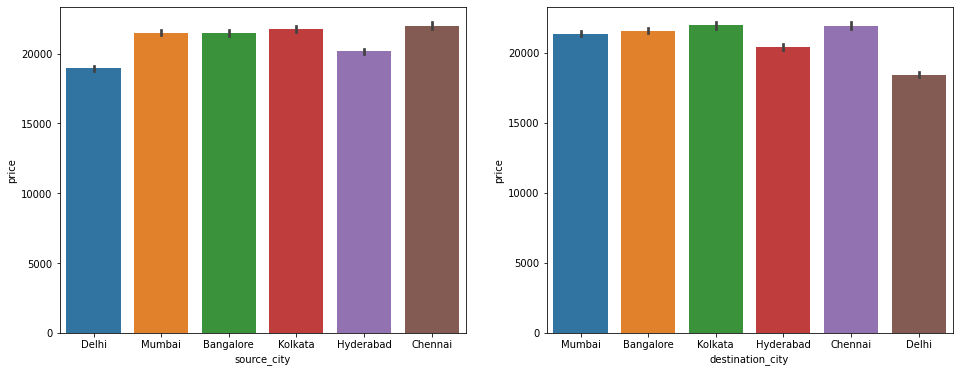

In [19]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.barplot(x = "source_city",y = "price",data = df1, ax = ax[0])
sns.barplot(x = "destination_city",y = "price",data = df1, ax = ax[1])
fig.show()

### From the above graphs we can conclude that prices are lowest for flights leaving from Delhi while it's highest for flights leaving from Chennai and Kolkata. Also the prices are lowest for flights going to Delhi while it's highest for flights going to Kolkata and Chennai. 

## Encoding all categoriacl columns

In [20]:
label_enc = preprocessing.LabelEncoder()

df1['airline'] = label_enc.fit_transform(df1['airline'])
df1['source_city'] = label_enc.fit_transform(df1['source_city'])
df1['destination_city'] = label_enc.fit_transform(df1['destination_city'])
df1['stops'] = label_enc.fit_transform(df1['stops'])
df1['CLASS'] = label_enc.fit_transform(df1['CLASS'])
df1['operating_time'] = label_enc.fit_transform(df1['operating_time'])

## Checking the data and the datatypes after encoding

In [21]:
df1.head(n = 5)

,airline,source_city,stops,destination_city,CLASS,duration,days_left,price,operating_time
0,4,2,2,5,1,2.17,1,5953,1
1,4,2,2,5,1,2.33,1,5953,1
2,0,2,2,5,1,2.17,1,5956,1
3,5,2,2,5,1,2.25,1,5955,1
4,5,2,2,5,1,2.33,1,5955,1


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   source_city       300153 non-null  int64  
 2   stops             300153 non-null  int64  
 3   destination_city  300153 non-null  int64  
 4   CLASS             300153 non-null  int64  
 5   duration          300153 non-null  float64
 6   days_left         300153 non-null  int64  
 7   price             300153 non-null  int64  
 8   operating_time    300153 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 20.6 MB


## Selecting feature matrix and target column

In [23]:
x1 = df1.drop(["price"],axis = 1).values
y1 = df1["price"].values
x1 = pd.DataFrame(x1)
y1 = pd.DataFrame(y1)

## Dropping correlated features

In [24]:
corr_x1 = x1.corr().abs()
upper_tri = corr_x1.where(np.triu(np.ones(corr_x1.shape), k = 1).astype(np.bool))
to_drop = [i for i in upper_tri.columns if any(upper_tri[i] > 0.8)]
X = x1.drop(to_drop, axis = 1, inplace= False); X

,0,1,2,3,4,5,6,7
0,4.0,2.0,2.0,5.0,1.0,2.17,1.0,1.0
1,4.0,2.0,2.0,5.0,1.0,2.33,1.0,1.0
2,0.0,2.0,2.0,5.0,1.0,2.17,1.0,1.0
3,5.0,2.0,2.0,5.0,1.0,2.25,1.0,1.0
4,5.0,2.0,2.0,5.0,1.0,2.33,1.0,1.0
...,...,...,...,...,...,...,...,...
300148,5.0,1.0,0.0,3.0,0.0,10.08,49.0,1.0
300149,5.0,1.0,0.0,3.0,0.0,10.42,49.0,1.0
300150,5.0,1.0,0.0,3.0,0.0,13.83,49.0,1.0
300151,5.0,1.0,0.0,3.0,0.0,10.00,49.0,1.0


In [25]:
to_drop

[]

In [26]:
corr_x1

,0,1,2,3,4,5,6,7
0,1.000000,0.028350,0.029838,0.030172,0.178862,0.001651,0.010678,0.106020
1,0.028350,1.000000,0.001819,0.222935,0.000075,0.008619,0.003568,0.004136
2,0.029838,0.001819,1.000000,0.012846,0.100262,0.473860,0.007047,0.055204
3,0.030172,0.222935,0.012846,1.000000,0.001603,0.001736,0.005323,0.046938
4,0.178862,0.000075,0.100262,0.001603,1.000000,0.138710,0.013039,0.056198
5,0.001651,0.008619,0.473860,0.001736,0.138710,1.000000,0.039157,0.026937
6,0.010678,0.003568,0.007047,0.005323,0.013039,0.039157,1.000000,0.021687
7,0.106020,0.004136,0.055204,0.046938,0.056198,0.026937,0.021687,1.000000


## Heatmap

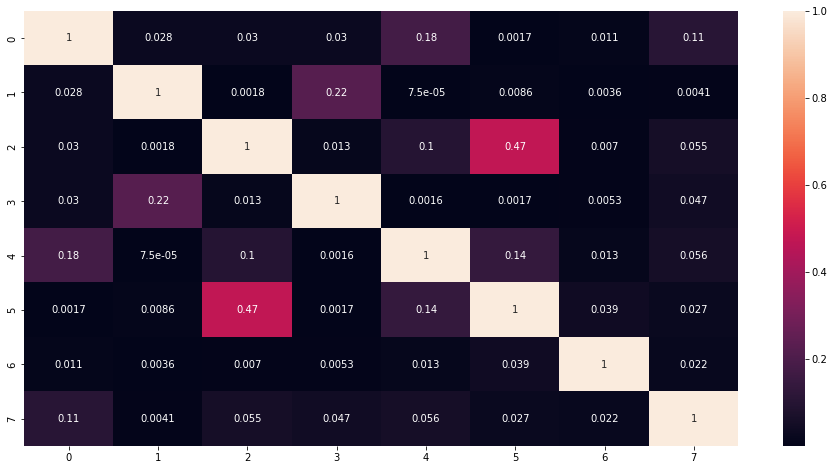

In [27]:
plt.subplots(figsize = (16,8))
sns.heatmap(corr_x1, annot = True)
plt.show()

# MODEL FITTING

## Standardizing the data

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x1)

array([[ 0.48827006, -0.32972125,  2.57700635, ..., -1.39753079,
        -1.84387477,  0.40651389],
       [ 0.48827006, -0.32972125,  2.57700635, ..., -1.3752838 ,
        -1.84387477,  0.40651389],
       [-1.69363332, -0.32972125,  2.57700635, ..., -1.39753079,
        -1.84387477,  0.40651389],
       ...,
       [ 1.0337459 , -0.90057609, -0.42679235, ...,  0.22371837,
         1.69569214,  0.40651389],
       [ 1.0337459 , -0.90057609, -0.42679235, ..., -0.30881888,
         1.69569214,  0.40651389],
       [ 1.0337459 , -0.90057609, -0.42679235, ..., -0.29769538,
         1.69569214,  0.40651389]])

## Splitting into train and test dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

## 1) Fitting OLS

In [30]:
res = sm.OLS(y_train, X_train).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      0   R-squared (uncentered):                   0.859
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                          1.458e+05
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                        0.00
Time:                        15:44:12   Log-Likelihood:                     -2.0705e+06
No. Observations:              192097   AIC:                                  4.141e+06
Df Residuals:                  192089   BIC:                                  4.141e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
y_test_predicted1 = res.predict(X_test)
y_val_predicted1 = res.predict(X_val)

## Finding accuarcy of the model

In [32]:
print("Testing accuracy:", r2_score(y_test_predicted1,y_test))
print("Validation accuracy:",r2_score(y_val_predicted1,y_val))

Testing accuracy: 0.6950570132620277
Validation accuracy: 0.7000388458067089


### OLS was chosen due to its simplicity but as the accuracy is not good we try to fit other models.

## 2) Fitting Linear model

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
y_test_predicted2 = lr.predict(X_test)
y_val_predicted2 = lr.predict(X_val)

## Finding accuarcy of the model


In [35]:
from sklearn.metrics import r2_score
print("Testing accuracy:", r2_score(y_test_predicted2,y_test))
print("Validation accuracy:",r2_score(y_val_predicted2,y_val))


Testing accuracy: 0.8952073931453933
Validation accuracy: 0.8950269354318166


### Linear regression is used for it's easier implementation and efficiency in training and in this case it gives us an accuracy of 89.5%.

### Next we fit the LASSO and RIDGE models in an attempt for improved accuracy.

## 3) Fitting Ridge model

In [36]:
ridge_regressor = Ridge(alpha = 0.9)
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=0.9)

In [37]:
y_test_predicted3 = ridge_regressor.predict(X_test)
y_val_predicted3 = ridge_regressor.predict(X_val)

## Finding accuracy of the model

In [38]:
print("Testing accuracy:", r2_score(y_test_predicted3,y_test))
print("Validation accuracy:",r2_score(y_val_predicted3,y_val))

Testing accuracy: 0.8952031499386621
Validation accuracy: 0.8950225037282965


## 4) Fitting Lasso model

In [39]:
lasso_regressor = linear_model.Lasso(alpha = 0.9)
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=0.9)

In [40]:
y_test_predicted4 = lasso_regressor.predict(X_test)
y_val_predicted4 = lasso_regressor.predict(X_val)

## Finding accuracy of the model

In [41]:
print("Testing accuracy:", r2_score(y_test_predicted4,y_test))
print("Validation accuracy:",r2_score(y_val_predicted4,y_val))

Testing accuracy: 0.8951878954171775
Validation accuracy: 0.8950061903363784


### Both the LASSO and RIDGE models gives us an accuracy of 89.5% which is same as that of a linear regression model.

## FINAL CONCLUSION

In [42]:
pd.DataFrame({'Models':['OLS','Linear','Ridge','Lasso'],
              'Test_Accuracy':[r2_score(y_test_predicted1,y_test),r2_score(y_test_predicted2,y_test),r2_score(y_test_predicted3,y_test),r2_score(y_test_predicted4,y_test)],
             'Validation_Accuracy':[r2_score(y_val_predicted1,y_val),r2_score(y_val_predicted2,y_val),r2_score(y_val_predicted3,y_val),r2_score(y_val_predicted4,y_val)]})

,Models,Test_Accuracy,Validation_Accuracy
0,OLS,0.695057,0.700039
1,Linear,0.895207,0.895027
2,Ridge,0.895203,0.895023
3,Lasso,0.895188,0.895006


### Above 4 models have been fit to the data.

### 1) OLS(Ordinary Least Squares): The test and validation accuracy of the model were 69% and 70% respectively.

### Hence we tried to fit a LINEAR model. 
### 2) For the Linear model the test and validation accuracy were 89.5% each.

### Next we tried to check for a further possible improvement of accuracy for which the LASSO and RIDGE models were implemented.

### 3) RIDGE: The test and validation accuracy of the model was 89.5% each.
### 4) LASSO: The test and validation accuracy of the model was again 89.5% each.

### Hence we conclude that adding a regularizer doesn't improve the accuracy in this case.

## Hence we choose a LINEAR regression model for it's easier implementation, interpretability and efficiency in training.

## MODEL BUILDING (PEAK VS NON-PEAK HOURS)

#### We have successfully built a linear model predicting the price of flight tickets. 

#### Now we aim to build a model that predicts the flight prices for peak and non-peak hours. 

#### This is quite helpful as passengers often want to see the price differences between various available tickets at different times so that they can travel at their desired time for least price and maximum comfort. It also helps the airlines keep a track of people's choice of flight times and adjust the prices accordingly. 

## Segregating the dataset based on operating hours(Peak VS Non-Peak)

In [43]:
df1_p = df1[df1['operating_time'] == 1]
df1_p

,airline,source_city,stops,destination_city,CLASS,duration,days_left,price,operating_time
0,4,2,2,5,1,2.17,1,5953,1
1,4,2,2,5,1,2.33,1,5953,1
2,0,2,2,5,1,2.17,1,5956,1
3,5,2,2,5,1,2.25,1,5955,1
4,5,2,2,5,1,2.33,1,5955,1
...,...,...,...,...,...,...,...,...,...
300148,5,1,0,3,0,10.08,49,69265,1
300149,5,1,0,3,0,10.42,49,77105,1
300150,5,1,0,3,0,13.83,49,79099,1
300151,5,1,0,3,0,10.00,49,81585,1


In [44]:
df1_np = df1[df1['operating_time'] == 0]
df1_np

,airline,source_city,stops,destination_city,CLASS,duration,days_left,price,operating_time
18,0,2,0,5,1,12.25,1,5949,0
34,5,2,0,5,1,18.00,1,12150,0
41,1,2,0,5,1,19.08,1,12150,0
48,0,2,0,5,1,15.17,1,12539,0
70,5,2,0,5,1,26.42,1,14408,0
...,...,...,...,...,...,...,...,...,...
300118,5,1,0,3,0,11.33,49,41064,0
300121,5,1,0,3,0,19.33,49,41064,0
300122,5,1,0,3,0,22.08,49,41064,0
300124,5,1,0,3,0,24.42,49,41064,0


## Selecting feature matrix and target column(for df1_p)

In [45]:
x11 = df1_p.drop(["price"],axis = 1).values
y11 = df1_p["price"].values
x11 = pd.DataFrame(x11)
y11 = pd.DataFrame(y11)

## Standardizing the data

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x11)

array([[ 0.44766658, -0.325956  ,  2.66699186, ..., -1.39679199,
        -1.83087046,  0.        ],
       [ 0.44766658, -0.325956  ,  2.66699186, ..., -1.37438116,
        -1.83087046,  0.        ],
       [-1.74646613, -0.325956  ,  2.66699186, ..., -1.39679199,
        -1.83087046,  0.        ],
       ...,
       [ 0.99619976, -0.8931843 , -0.41485796, ...,  0.23639685,
         1.70061803,  0.        ],
       [ 0.99619976, -0.8931843 , -0.41485796, ..., -0.30006226,
         1.70061803,  0.        ],
       [ 0.99619976, -0.8931843 , -0.41485796, ..., -0.28885685,
         1.70061803,  0.        ]])

## Splitting into train and test dataset

In [47]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(x11, y11, test_size = 0.2, random_state = 0)
X_train_p, X_val_p, y_train_p, y_val_p = train_test_split(X_train_p, y_train_p, test_size = 0.2, random_state = 0)

## Fitting Linear model

### Here we are fitting a linear model as we have previously seen that it gives us the best result for this dataset.

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_p,y_train_p)

LinearRegression()

In [49]:
y_test_predicted_p = lr.predict(X_test_p)
y_val_predicted_p = lr.predict(X_val_p)

## Finding accuracy of the model

In [50]:
from sklearn.metrics import r2_score
print("Testing accuracy:", r2_score(y_test_predicted_p,y_test_p))
print("Validation accuracy:",r2_score(y_val_predicted_p,y_val_p))

Testing accuracy: 0.8954872865385664
Validation accuracy: 0.8948347547793266


## Selecting feature matrix and target column(for df1_np)

In [51]:
x12 = df1_p.drop(["price"],axis = 1).values
y12 = df1_p["price"].values
x12 = pd.DataFrame(x12)
y12 = pd.DataFrame(y12)

## Standardizing the data

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x12)

array([[ 0.44766658, -0.325956  ,  2.66699186, ..., -1.39679199,
        -1.83087046,  0.        ],
       [ 0.44766658, -0.325956  ,  2.66699186, ..., -1.37438116,
        -1.83087046,  0.        ],
       [-1.74646613, -0.325956  ,  2.66699186, ..., -1.39679199,
        -1.83087046,  0.        ],
       ...,
       [ 0.99619976, -0.8931843 , -0.41485796, ...,  0.23639685,
         1.70061803,  0.        ],
       [ 0.99619976, -0.8931843 , -0.41485796, ..., -0.30006226,
         1.70061803,  0.        ],
       [ 0.99619976, -0.8931843 , -0.41485796, ..., -0.28885685,
         1.70061803,  0.        ]])

## Splitting into train and test dataset

In [53]:
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(x12, y12, test_size = 0.2, random_state = 0)
X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(X_train_np, y_train_np, test_size = 0.2, random_state = 0)

## Fitting Linear model

### Here we again fit a linear model as we have previously seen that it gives us the best result for this dataset.

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_np,y_train_np)

LinearRegression()

In [55]:
y_test_predicted_np = lr.predict(X_test_np)
y_val_predicted_np = lr.predict(X_val_np)

## Finding accuracy of the model

In [56]:
from sklearn.metrics import r2_score
print("Testing accuracy:", r2_score(y_test_predicted_np,y_test_np))
print("Validation accuracy:",r2_score(y_val_predicted_np,y_val_np))

Testing accuracy: 0.8954872865385664
Validation accuracy: 0.8948347547793266


### Above we have built and trained 2 models for predicting flight prices at peak and non-peak hours both at an accuracy of 89.5%.

## APPLYING DIFFERENT OPTIMIZERS 

### Here we apply different optimizers to reduce the loss or improve the accuracy of the model. We further compare the optimizers to see which optimizer(s) gives us the best output.

## REGRESSION USING ANN

### Here we use ANN to handle the multiple features of the input dataset

In [57]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.001
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    #Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

## 1) STOCHASTIC GRADIENT DESCENT

In [59]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss = msle, 
    optimizer = SGD(learning_rate=learning_rate), 
    metrics = [msle]
)
# train the model
history1 = model.fit(
    X_train, 
    y_train.values, 
    epochs=20, 
    batch_size=1,
    validation_split=0.2
)

Epoch 1/20
153677/153677 [==============================] - 315s 2ms/step - loss: 0.9951 - mean_squared_logarithmic_error: 0.9951 - val_loss: 0.9359 - val_mean_squared_logarithmic_error: 0.9359
Epoch 2/20
153677/153677 [==============================] - 297s 2ms/step - loss: 0.8589 - mean_squared_logarithmic_error: 0.8589 - val_loss: 0.7459 - val_mean_squared_logarithmic_error: 0.7459
Epoch 3/20
153677/153677 [==============================] - 295s 2ms/step - loss: 0.5304 - mean_squared_logarithmic_error: 0.5304 - val_loss: 0.3192 - val_mean_squared_logarithmic_error: 0.3192
Epoch 4/20
153677/153677 [==============================] - 296s 2ms/step - loss: 0.2229 - mean_squared_logarithmic_error: 0.2229 - val_loss: 0.1694 - val_mean_squared_logarithmic_error: 0.1694
Epoch 5/20
153677/153677 [==============================] - 295s 2ms/step - loss: 0.1359 - mean_squared_logarithmic_error: 0.1359 - val_loss: 0.1169 - val_mean_squared_logarithmic_error: 0.1169
Epoch 6/20
153677/153677 [====

In [60]:
def plot_history(history, key, title):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.title(title)
  plt.xlabel("Iterations")
  plt.ylabel(key)
  plt.legend(['training_'+key, 'validation_'+key])
  plt.show()

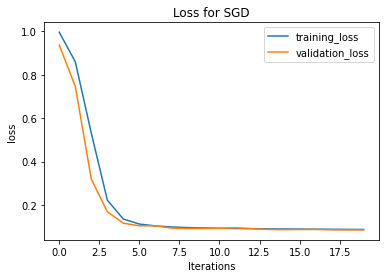

In [61]:
plot_history(history1, 'loss', 'Loss for SGD')

In [62]:
y_pred = model.predict(X_test)

In [63]:
r_SGD = r2_score(y_test, y_pred)
print('Accuracy obtained by SGD ', r_SGD)

Accuracy obtained by SGD  0.9289095675248266


## 2) SGD USING MINIBATCHING


In [64]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss = msle, 
    optimizer = SGD(learning_rate=learning_rate), 
    metrics = [msle]
)
# train the model
history2 = model.fit(
    X_train, 
    y_train.values, 
    epochs=50, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/50
2402/2402 [==============================] - 17s 7ms/step - loss: 0.0863 - mean_squared_logarithmic_error: 0.0863 - val_loss: 0.0847 - val_mean_squared_logarithmic_error: 0.0847
Epoch 2/50
2402/2402 [==============================] - 12s 5ms/step - loss: 0.0860 - mean_squared_logarithmic_error: 0.0860 - val_loss: 0.0845 - val_mean_squared_logarithmic_error: 0.0845
Epoch 3/50
2402/2402 [==============================] - 12s 5ms/step - loss: 0.0859 - mean_squared_logarithmic_error: 0.0858 - val_loss: 0.0845 - val_mean_squared_logarithmic_error: 0.0844
Epoch 4/50
2402/2402 [==============================] - 13s 5ms/step - loss: 0.0859 - mean_squared_logarithmic_error: 0.0858 - val_loss: 0.0845 - val_mean_squared_logarithmic_error: 0.0844
Epoch 5/50
2402/2402 [==============================] - 12s 5ms/step - loss: 0.0859 - mean_squared_logarithmic_error: 0.0859 - val_loss: 0.0845 - val_mean_squared_logarithmic_error: 0.0844
Epoch 6/50
2402/2402 [==============================] -

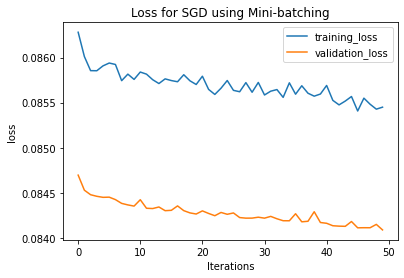

In [65]:
plot_history(history2,'loss', 'Loss for SGD using Mini-batching')

In [66]:
y_pred = model.predict(X_test)

In [67]:
r_SGD_MB = r2_score(y_test, y_pred)
print('Accuracy obtained by minibatching ', r_SGD_MB)

Accuracy obtained by minibatching  0.9320280012705242


## 3) SGD USING MOMENTUM

In [68]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [70]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=SGD(learning_rate=learning_rate,momentum=0.9), 
    metrics=[msle]
)
# train the model
history3 = model.fit(
    X_train, 
    y_train.values, 
    epochs=25, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/25
2402/2402 [==============================] - 29s 11ms/step - loss: 0.9274 - mean_squared_logarithmic_error: 0.9273 - val_loss: 0.7782 - val_mean_squared_logarithmic_error: 0.7783
Epoch 2/25
2402/2402 [==============================] - 17s 7ms/step - loss: 0.4765 - mean_squared_logarithmic_error: 0.4764 - val_loss: 0.2289 - val_mean_squared_logarithmic_error: 0.2289
Epoch 3/25
2402/2402 [==============================] - 13s 5ms/step - loss: 0.1747 - mean_squared_logarithmic_error: 0.1747 - val_loss: 0.1260 - val_mean_squared_logarithmic_error: 0.1260
Epoch 4/25
2402/2402 [==============================] - 14s 6ms/step - loss: 0.1293 - mean_squared_logarithmic_error: 0.1293 - val_loss: 0.1137 - val_mean_squared_logarithmic_error: 0.1136
Epoch 5/25
2402/2402 [==============================] - 13s 5ms/step - loss: 0.1167 - mean_squared_logarithmic_error: 0.1167 - val_loss: 0.1086 - val_mean_squared_logarithmic_error: 0.1085
Epoch 6/25
2402/2402 [==============================] 

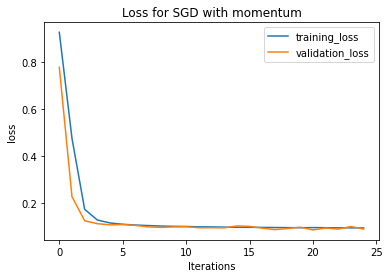

In [71]:
plot_history(history3, 'loss', 'Loss for SGD with momentum')

In [72]:
y_pred_N=model.predict(X_test)

In [73]:
r_SGD_N = r2_score(y_test, y_pred_N)
print('Accuracy obtained by SGD with Nesterov Momentum ', r_SGD_N)

Accuracy obtained by SGD with Nesterov Momentum  0.9326269470276314


## 4) Using RMSprop

In [82]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=RMSprop(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history4 = model.fit(
    X_train, 
    y_train.values, 
    epochs=25, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/25
2402/2402 [==============================] - 27s 11ms/step - loss: 0.0639 - mean_squared_logarithmic_error: 0.0639 - val_loss: 0.0965 - val_mean_squared_logarithmic_error: 0.0965
Epoch 2/25
2402/2402 [==============================] - 16s 7ms/step - loss: 0.0637 - mean_squared_logarithmic_error: 0.0637 - val_loss: 0.1353 - val_mean_squared_logarithmic_error: 0.1353
Epoch 3/25
2402/2402 [==============================] - 16s 7ms/step - loss: 0.0637 - mean_squared_logarithmic_error: 0.0637 - val_loss: 0.1189 - val_mean_squared_logarithmic_error: 0.1189
Epoch 4/25
2402/2402 [==============================] - 15s 6ms/step - loss: 0.0637 - mean_squared_logarithmic_error: 0.0637 - val_loss: 0.1130 - val_mean_squared_logarithmic_error: 0.1129
Epoch 5/25
2402/2402 [==============================] - 15s 6ms/step - loss: 0.0635 - mean_squared_logarithmic_error: 0.0635 - val_loss: 0.1458 - val_mean_squared_logarithmic_error: 0.1458
Epoch 6/25
2402/2402 [==============================] 

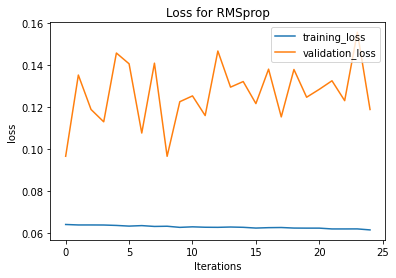

In [83]:
plot_history(history4, 'loss', 'Loss for RMSprop')

In [84]:
y_pred_R=model.predict(X_test)

In [85]:
r_RM = r2_score(y_test, y_pred_R)
print('Accuracy obtained by RMSprop ', r_RM)

Accuracy obtained by RMSprop  0.8119856848369599


## 5) Using ADAM

In [91]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history5 = model.fit(
    X_train, 
    y_train.values, 
    epochs=25, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/25
2402/2402 [==============================] - 14s 5ms/step - loss: 0.0603 - mean_squared_logarithmic_error: 0.0603 - val_loss: 0.1458 - val_mean_squared_logarithmic_error: 0.1458
Epoch 2/25
2402/2402 [==============================] - 13s 5ms/step - loss: 0.0622 - mean_squared_logarithmic_error: 0.0622 - val_loss: 0.1311 - val_mean_squared_logarithmic_error: 0.1311
Epoch 3/25
2402/2402 [==============================] - 13s 5ms/step - loss: 0.0613 - mean_squared_logarithmic_error: 0.0613 - val_loss: 0.1571 - val_mean_squared_logarithmic_error: 0.1571
Epoch 4/25
2402/2402 [==============================] - 13s 6ms/step - loss: 0.0591 - mean_squared_logarithmic_error: 0.0591 - val_loss: 0.1183 - val_mean_squared_logarithmic_error: 0.1183
Epoch 5/25
2402/2402 [==============================] - 15s 6ms/step - loss: 0.0588 - mean_squared_logarithmic_error: 0.0588 - val_loss: 0.1194 - val_mean_squared_logarithmic_error: 0.1194
Epoch 6/25
2402/2402 [==============================] -

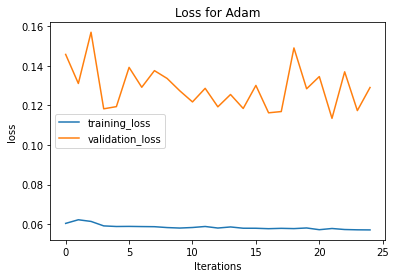

In [92]:
plot_history(history5, 'loss', 'Loss for Adam')

In [93]:
y_pred_A=model.predict(X_test)

In [94]:
r_A = r2_score(y_test, y_pred_A)
print('Accuracy obtained by Adam ', r_A)

Accuracy obtained by Adam  0.7716063222666132


## 6) Using AdaGrad

In [95]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adagrad(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history6 = model.fit(
    X_train, 
    y_train.values, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/100
2402/2402 [==============================] - 14s 6ms/step - loss: 0.0547 - mean_squared_logarithmic_error: 0.0547 - val_loss: 0.1278 - val_mean_squared_logarithmic_error: 0.1277
Epoch 2/100
2402/2402 [==============================] - 13s 5ms/step - loss: 0.0543 - mean_squared_logarithmic_error: 0.0543 - val_loss: 0.1273 - val_mean_squared_logarithmic_error: 0.1273
Epoch 3/100
2402/2402 [==============================] - 13s 6ms/step - loss: 0.0541 - mean_squared_logarithmic_error: 0.0541 - val_loss: 0.1302 - val_mean_squared_logarithmic_error: 0.1302
Epoch 4/100
2402/2402 [==============================] - 13s 5ms/step - loss: 0.0540 - mean_squared_logarithmic_error: 0.0540 - val_loss: 0.1294 - val_mean_squared_logarithmic_error: 0.1294
Epoch 5/100
2402/2402 [==============================] - 13s 5ms/step - loss: 0.0540 - mean_squared_logarithmic_error: 0.0540 - val_loss: 0.1282 - val_mean_squared_logarithmic_error: 0.1282
Epoch 6/100
2402/2402 [===========================

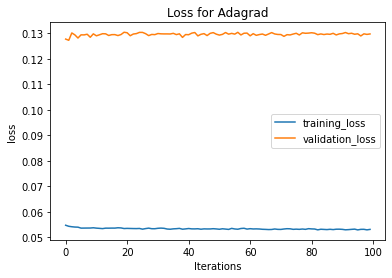

In [96]:
plot_history(history6, 'loss', 'Loss for Adagrad')

In [97]:
y_pred_Ag=model.predict(X_test)

In [98]:
r_Ag = r2_score(y_test, y_pred_Ag)
print('Accuracy obtained by AdaGrad ', r_Ag)

Accuracy obtained by AdaGrad  0.7759631293976956


## Comparing the optimizers 

In [99]:
pd.DataFrame({'Optimizers':['SGD','SGD_MINIBATCH','SGD_MOMENTUM','RMS_PROP','ADAM','ADAGRAD'],
              'Accuracy':[r_SGD,r_SGD_MB,r_SGD_N,r_RM,r_A,r_Ag]})

,Optimizers,Accuracy
0,SGD,0.928910
1,SGD_MINIBATCH,0.932028
2,SGD_MOMENTUM,0.932627
3,RMS_PROP,0.811986
4,ADAM,0.771606
5,ADAGRAD,0.775963


### From the above results we can see that the SGD gives an accuracy of 92%.

### Among SGD variants minibatch and momentum works better as for minibatching the batch size was increased and for momentum as it has information on it's past direction.

### For Adagrad the performance is low as its requires a larger number of epochs as the learning rate decreases for each iteration. It can be improved by increasing the number of epochs.